# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'&q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url+city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"] 
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]  

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | kloulklubed
Processing Record 4 of Set 1 | atafu village
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | happy valley-goose bay
Processing Record 7 of Set 1 | enewetak
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | raahe
Processing Record 11 of Set 1 | bure
Processing Record 12 of Set 1 | metkovic
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | vilyuchinsk
Processing Record 16 of Set 1 | sitangkai
Processing Record 17 of Set 1 | cesky krumlov
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | papao
Processing Record 20 of Set 1 | leh
Processing Record 21 of Set 1 | cabugao
Processing Record 22 of Set 1 | mugia
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,23.99,78,75,9.77,CC,1690499668
1,grytviken,-54.2811,-36.5092,-2.28,84,100,4.61,GS,1690499668
2,kloulklubed,7.0419,134.2556,25.28,76,100,11.76,PW,1690499668
3,atafu village,-8.5421,-172.5159,28.07,78,27,7.35,TK,1690499669
4,yellowknife,62.4560,-114.3525,24.29,31,75,5.14,CA,1690499669


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,23.99,78,75,9.77,CC,1690499668
1,grytviken,-54.2811,-36.5092,-2.28,84,100,4.61,GS,1690499668
2,kloulklubed,7.0419,134.2556,25.28,76,100,11.76,PW,1690499668
3,atafu village,-8.5421,-172.5159,28.07,78,27,7.35,TK,1690499669
4,yellowknife,62.4560,-114.3525,24.29,31,75,5.14,CA,1690499669


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

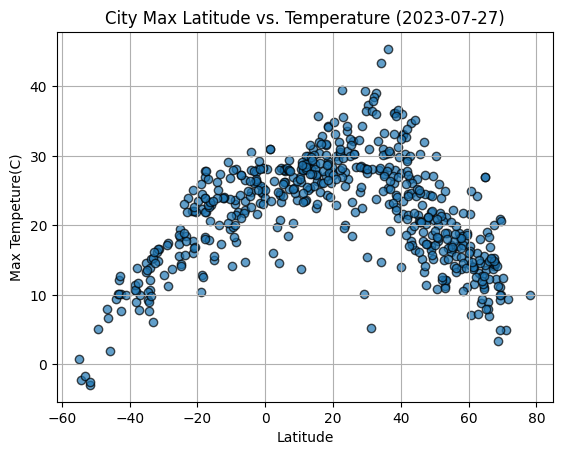

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black",
            marker="o",
            label="Cities", 
            alpha=0.7)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-07-27)")
plt.ylabel("Max Tempeture(C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

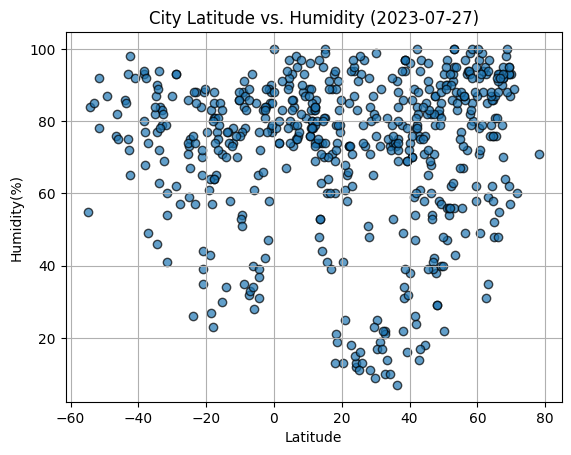

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black",
            marker="o",
            label="Cities", 
            alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-07-27)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

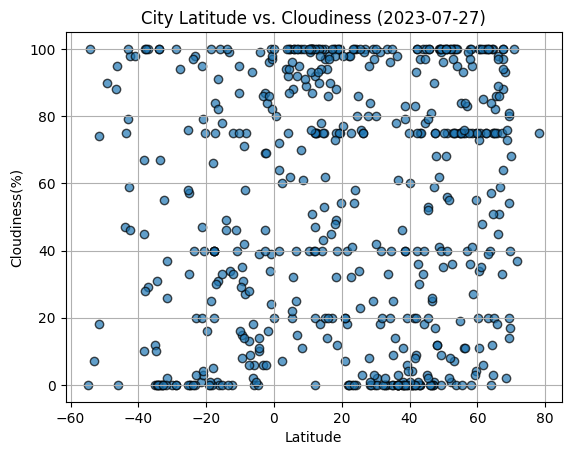

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black",
            marker="o",
            label="Cities", 
            alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-07-27)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

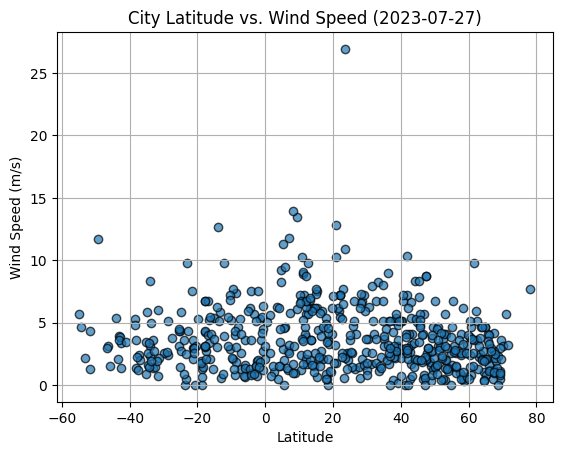

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black",
            marker="o",
            label="Cities", 
            alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-07-27)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def my_function (xvalues,yvalues,title,coordinates):
    (pe_slope, pe_int, pe_r, pe_p, pe_std_err) = linregress(xvalues,yvalues)
    pe_fit = pe_slope * xvalues + pe_int
    line_equation="y="+ str(round(pe_slope,2)) + "x +" + str(round(pe_int,2))
    plt.scatter(xvalues,yvalues)
    plt.plot(xvalues,pe_fit,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.annotate(line_equation, coordinates, fontsize=15, color="red")
    print(f"The r-value is: {pe_r**2}")
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= pd.DataFrame(city_data_df)

# Filter the DataFrame for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kloulklubed,7.0419,134.2556,25.28,76,100,11.76,PW,1690499668
4,yellowknife,62.4560,-114.3525,24.29,31,75,5.14,CA,1690499669
5,happy valley-goose bay,53.3168,-60.3315,21.17,43,75,4.12,CA,1690499669
6,enewetak,11.3474,162.3373,28.21,80,100,7.19,MH,1690499670
7,bethel,41.3712,-73.4140,30.26,89,20,0.00,US,1690499670


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
sourthern_hemi_df= pd.DataFrame(city_data_df)

# Filter the DataFrame for the Northern Hemisphere
sourthern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
sourthern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,23.99,78,75,9.77,CC,1690499668
1,grytviken,-54.2811,-36.5092,-2.28,84,100,4.61,GS,1690499668
3,atafu village,-8.5421,-172.5159,28.07,78,27,7.35,TK,1690499669
8,puerto natales,-51.7236,-72.4875,-2.96,92,74,1.26,CL,1690499670
12,adamstown,-25.0660,-130.1015,19.43,59,33,1.43,PN,1690499672


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.40747528411056866


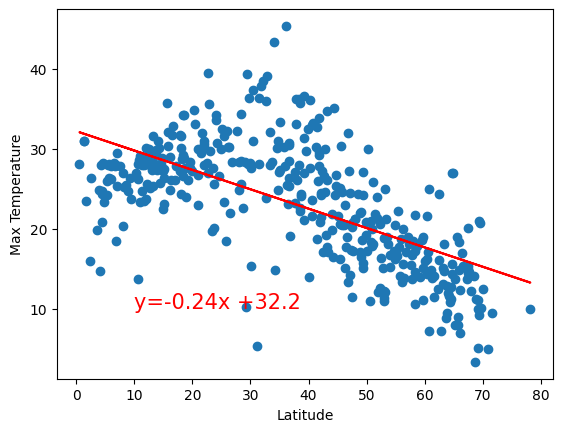

In [25]:
# Linear regression on Northern Hemisphere
xvalues = northern_hemi_df['Lat']
yvalues = northern_hemi_df['Max Temp']


# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
# plt.annotate(line_equation, coordinates, fontsize=15, color="red")

# Predict temperature using the regression line
predicted_temperature = my_function(xvalues, yvalues,'Max Temperature', (10,10))



The r-value is: 0.7571580399351628


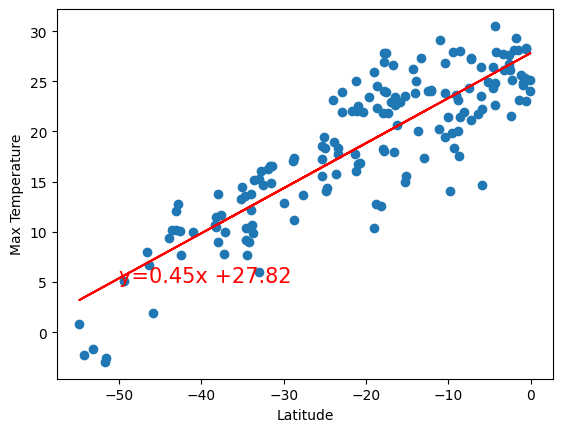

In [26]:
# Linear regression on Southern Hemisphere
xvalues = sourthern_hemi_df['Lat']
yvalues = sourthern_hemi_df['Max Temp']


# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
# plt.annotate(line_equation, coordinates, fontsize=15, color="red")

# Predict temperature using the regression line
predicted_temperature = my_function(xvalues, yvalues,'Max Temperature', (-50,5))

**Discussion about the linear relationship:** The r-value for the model is 0.41, indicating that approximately 41% of the variability in the temperature can be explained by the variation in latitude on Northern Hemisphere. It will also be observed that on the Southern Hemisphere the r-value for the model is 0.75, indicating that approximately 75% of the variability in the temperature can be explained by the variation in latitude. This suggest a moderate relationship between temperature and latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.004429717385679215


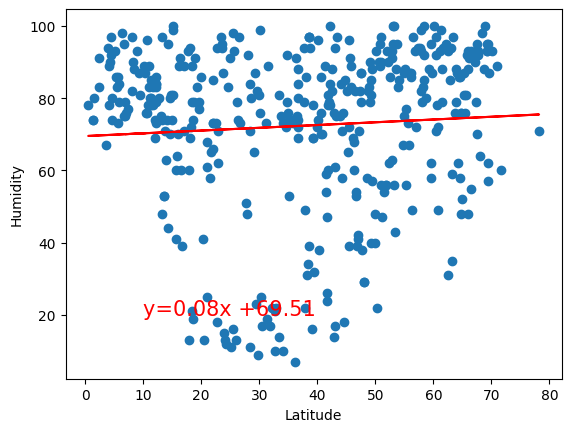

In [27]:
# Northern Hemisphere
xvalues = northern_hemi_df['Lat']
yvalues = northern_hemi_df['Humidity']


# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# plt.annotate(line_equation, coordinates, fontsize=15, color="red")

# Predict temperature using the regression line
predicted_temperature = my_function(xvalues, yvalues,'Humidity', (10,20))

The r-value is: 0.028612238163495812


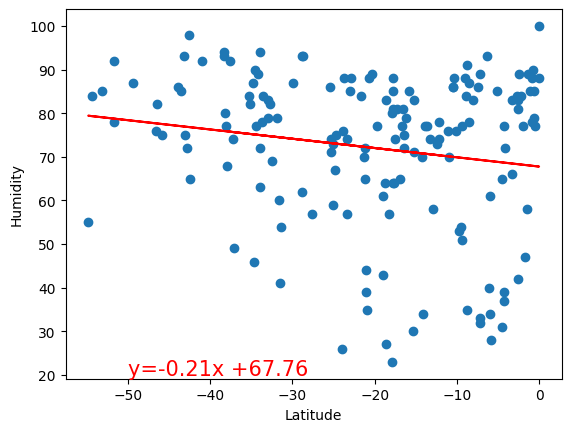

In [31]:
# Southern Hemisphere
xvalues = sourthern_hemi_df['Lat']
yvalues = sourthern_hemi_df['Humidity']


# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# plt.annotate(line_equation, coordinates, fontsize=15, color="red")

# Predict temperature using the regression line
predicted_temperature = my_function(xvalues, yvalues,'Humidity', (-50,20))

**Discussion about the linear relationship:** : Both R-squared values are very close to zero, which indicates that the linear regression model explains only a negligible portion of the variability in humidity based on latitude. In other words, latitude alone does not serve as a strong predictor of humidity levels in either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.005757027666924702


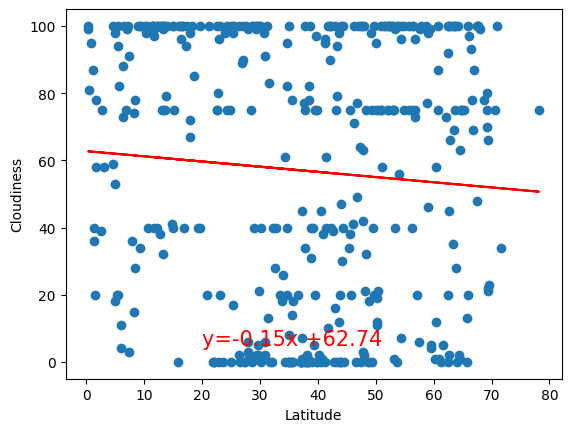

In [19]:
# Northern Hemisphere
xvalues = northern_hemi_df['Lat']
yvalues = northern_hemi_df['Cloudiness']


# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# plt.annotate(line_equation, coordinates, fontsize=15, color="red")

# Predict temperature using the regression line
predicted_temperature = my_function(xvalues, yvalues,'Cloudiness', (20,5))

The r-value is: 0.003294778539769125


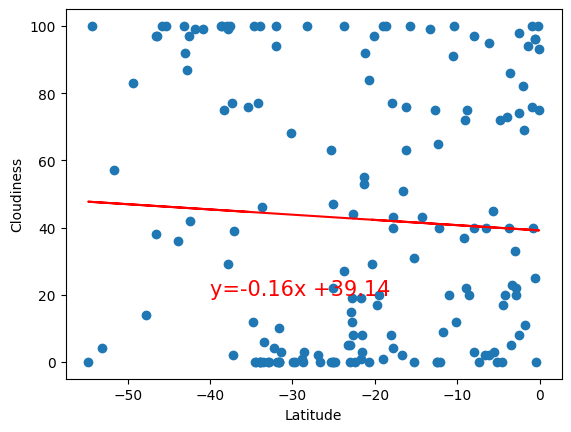

In [23]:
# Southern Hemisphere
xvalues = sourthern_hemi_df['Lat']
yvalues = sourthern_hemi_df['Cloudiness']


# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# plt.annotate(line_equation, coordinates, fontsize=15, color="red")

# Predict temperature using the regression line
predicted_temperature = my_function(xvalues, yvalues,'Cloudiness', (-40,20))

**Discussion about the linear relationship:** The R-squared values for both hemispheres are extremely close to zero, indicating that the linear regression model explains only a negligible amount of the variability in cloudiness based on latitude. In simple terms, latitude alone has very little predictive power for cloudiness levels in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08120941218355679


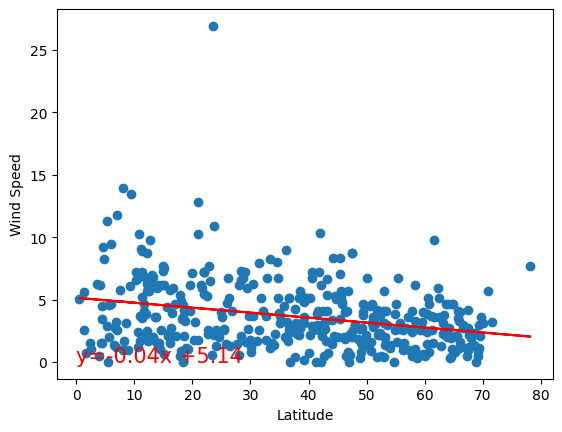

In [33]:
# Northern Hemisphere
xvalues = northern_hemi_df['Lat']
yvalues = northern_hemi_df['Wind Speed']


# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# plt.annotate(line_equation, coordinates, fontsize=15, color="red")

# Predict temperature using the regression line
predicted_temperature = my_function(xvalues, yvalues,'Wind Speed', (0,0))

The r-value is: 0.00034510251725961976


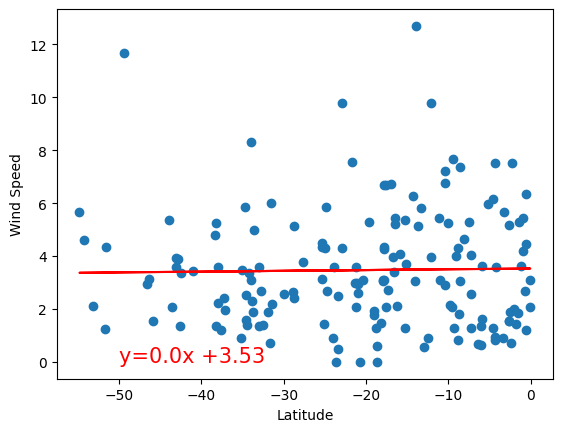

In [32]:
# Southern Hemisphere
xvalues = sourthern_hemi_df['Lat']
yvalues = sourthern_hemi_df['Wind Speed']


# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# plt.annotate(line_equation, coordinates, fontsize=15, color="red")

# Predict temperature using the regression line
predicted_temperature = my_function(xvalues, yvalues,'Wind Speed', (-50,0))

**Discussion about the linear relationship:**  The R-squared values for both hemispheres indicate a relatively weak linear relationship between wind speed and latitude. While the R-squared value for the Northern Hemisphere is higher than that of the Southern Hemisphere, both values are still quite low. This suggests that latitude alone explains only a small portion of the variability in wind speed.